Importa as bibliotecas a serem utilizadas.

In [1]:
import pandas as pd
import numpy as np

from PIL import Image
import matplotlib.pyplot as plt

import requests
from bs4 import BeautifulSoup
from wordcloud import WordCloud
from wordcloud import STOPWORDS

Utilizando o requests coleta o html da pagina do G1

In [2]:
url = 'https://g1.globo.com/politica/noticia/2020/05/22/leia-integra-da-transcricao-do-video-da-reuniao-ministerial-de-22-de-abril-entre-bolsonaro-e-ministros.ghtml'
req = requests.get(url)
soup = BeautifulSoup(req.text, 'html')

Analisando o HTML identifica as TAGs para realizar os filtros para encontrar as informações desejadas e coloca em uma lista.

In [4]:
list_tag_p = soup.find('div', {'class': 'mc-article-body'})\
                 .find('div', {'class': 'wall protected-content'})\
                 .find_all('div', {'class': 'mc-column content-text active-extra-styles'})

Realiza mais um filtro pela TAG 'p' do HTML, realiza uma separação da string por ':' para separar o autor da frase e coloca em uma segunda lista.

Ex: (Braga Netto: Posso chamar a atenção do Ramos?)

In [5]:
list_text = []
for tag_p in list_tag_p:
    list_text.append(tag_p.find('p').text.split(':', 1))

Converte a lista em um Dataframe e separa as frases dos autores para serem utilizadas.

In [10]:
df = pd.DataFrame(list_text[2:])
text = df[1].values

Primeiro teste.

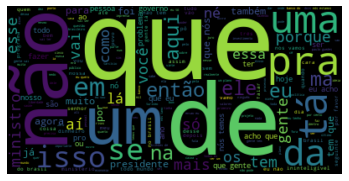

In [111]:
wordcloud = WordCloud().generate(str(text).lower())
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Cria um set com as palavras que não fazem sentido ou não gostariamos de apresentar em nossa nuvem de palavras.

In [122]:
stopwords = set(STOPWORDS)
stopwords.update(['que', 'um', 'de', 'pra', 'ele', 'uma', 'em', 'então',
                  'não', 'isso', 'tem', 'né', 'só', 'tá', 'da', 'você',
                  'aqui', 'eu', 'na', 'aí', 'esse', 'essa', 'acho', 'vai',
                  'mais', 'como', 'lá', 'por', 'que', 'ser', 'os', 'as', 'hoje',
                  'nós', 'para', 'nosso', 'nossa', 'bem', 'pro', 'se', 'fazer',
                  'já', 'nó', 'ao', 'ter', 'foi', 'são', 'pode', 'da',
                  'do', 'porque', 'até', 'ou', 'nós', 'meu', 'quem', 'muito',
                  'minha', 'tô', 'vou', 'estar', 'vamos', 'vamo', 'desse',
                  'dessa', 'todo', 'tudo', 'vão', 'tudo', 'gente', 'pelo',
                  'pela', 'uns', 'também', 'assim', 'sem', 'o', 'os', 'a',
                  'as', 'era', 'agora', 'ma', 'ia', 'risos', 'ininteligível'])

Segundo teste usando stopwords

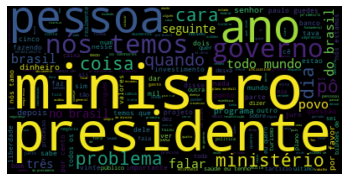

In [123]:
wordcloud = WordCloud(stopwords=stopwords).generate(str(text).lower())
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

As palavras mais evidentes são presidente e misnistro, mas como são utilizadas para se dirigir a uma outra pessoa achei interessante remove-las.

In [124]:
stopwords.update(['presidente', 'ministro'])

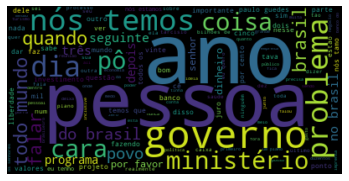

In [125]:
wordcloud = WordCloud(stopwords=stopwords).generate(str(text).lower())
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Agora carregar a imagem do Congresso Nacional e colocar a numvem de palavras dentro.

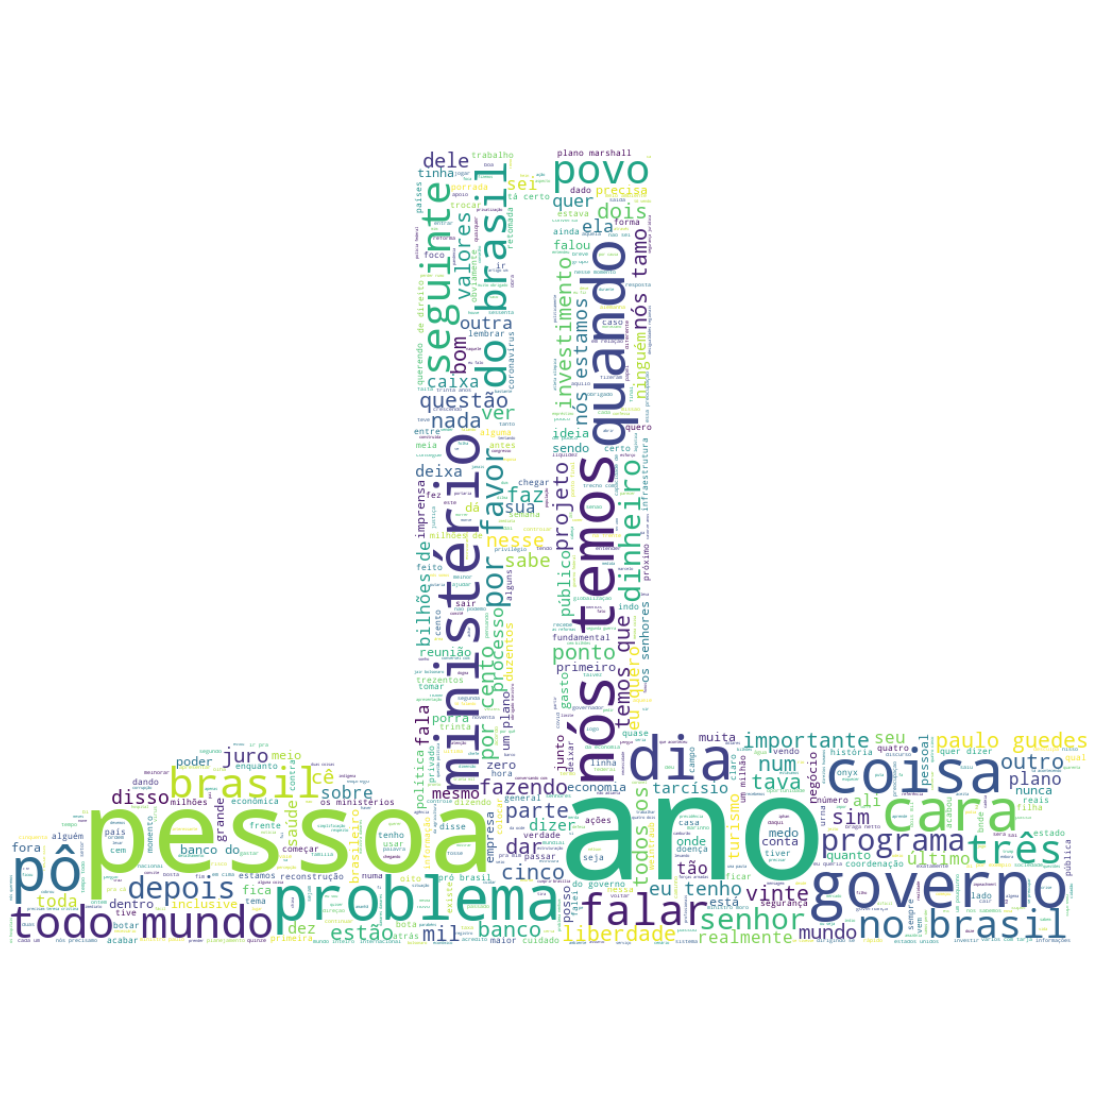

In [126]:
national_congress = np.array(Image.open("NationalCongress.png"))

wordcloud = WordCloud(stopwords=stopwords,
                      max_words=1500,
                      background_color="white",
                      mask=national_congress).generate(str(text).lower())

plt.figure(figsize=[20,20])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()